<h3>Stool microbiome and diabetes </h3>

The microbiome refers to all the microorganisms that live on or within the human body. Microorganisms can be found thriving in many sites of the body, including the skin, uterus, mouth and gastrointestinal tract. In fact it is estimated that there are more bacteria than cells in the human body, thus it is not surprising that some studies have shown the microbiome has a significant impact on physical and even mental health. We have so much interdependence with the bacteria living on or in us, some studies have shown that the species composition of the gut microbiome is associated with many diseases, from cancer to metabolic syndrome. There is crosstalk between our body and the microbiome, our lifestyles and habits can alter the communities of our microbiome; their diversity and composition in turn affect our health.

My graduate research was on microbiology so I am quite interested in the composition of an individual's stool microbiome and their physical status, in this case, whether the person is obsese or not. I am particularly curious about the genus/species of bacteria that the model finds to be important for the prediction.

The dataset I'm using is a human metagenomics dataset from Kaggle which can be found [here](https://www.kaggle.com/antaresnyc/human-metagenomics?select=abundance_stoolsubset.csv).

Credits to the original authors of the study and Kaggle user Alexey Kotlik who uploaded it.

In [1]:
### import packages ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
### import raw data

data = pd.read_csv('metagenomics/abundance_stoolsubset.csv', dtype='str')
cols = data.columns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Let's take a look at the raw data

print('sample dimensions are {} rows by {} columns'.format(data.shape[0], data.shape[1]))
print('')
data.head(2)

sample dimensions are 1989 rows by 2339 columns



,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0


This dataset is pretty high dimensional with 2339 columns, but most of the columns are not really relevant to what I'm doing. Gender, age and country is available too, which gives me an idea to try something similar to this but see if I can differentiate gender or location based on microbiome. But that'll be something for the future.

Since I'm interested in obesity, I'll filter for that data with indicators of obesity and normal individuals. I got my BMI categories here from [NIH](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm), which is:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">Underweight</th>
    <th class="tg-c3ow">&lt;18.5</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">Normal</td>
    <td class="tg-c3ow">18.5-24.9</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Overweight</td>
    <td class="tg-c3ow">25-29.9</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Obesity</td>
    <td class="tg-c3ow">&gt;=30</td>
  </tr>
</tbody>
</table>

In the cell below, I drop the columns which I won't be using, except for some that identifies where the sample is from. I won't be using data from individuals with other diseases, only those who are healthy or obese, so as to not add any confounding variables or other complications in the modeling.

In [4]:
### preprocess data ###

# filter for categories of interest

processed = data[data['disease'].isin(['obesity', 'obese', 'overweight','leaness', 'n'])].copy()

# drop columns that are not needed
to_drop = list(cols[2:4]) + list(cols[8:20]) + list(cols[21:211])
processed.drop(columns = to_drop, inplace = True)

# remove samples without bmi, convert bmi and abundance to float and filter for regular weight and obese
processed = processed[~processed['bmi'].isin(['na', 'nd'])]

processed['bmi'] = pd.to_numeric(processed['bmi'], downcast ='float')

processed.iloc[:, 7:] = processed.iloc[:, 7:].apply(pd.to_numeric)


# create labels for classification

bmi = [(processed['bmi'] >= 18.5) & (processed['bmi'] < 25), (processed['bmi'] >= 25) & (processed['bmi'] < 30), processed['bmi'] >= 30 ]

categories = ['2','3','4']

processed['bmi_category'] = np.select(bmi, categories, default = '1')



In [187]:
processed['bmi_category'].value_counts()

2    444
4    309
3    177
1     35
Name: bmi_category, dtype: int64

I also noticed some "redundancy" in the relative abdundance data which should be removed after the initial data cleaning:

The relative abundance for every species is recorded multiple times in the data, as an example, let's look at the data for Archaea bacteria for the $6^{th}$ observation

In [5]:
processed.iloc[5, 7:20]

k__Archaea                                                                                                                                                                                      0.4308
k__Archaea|p__Euryarchaeota                                                                                                                                                                     0.4308
k__Archaea|p__Euryarchaeota|c__Methanobacteria                                                                                                                                                  0.4308
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales                                                                                                                            0.4308
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae                                                                                                     0.4308
k__Ar

The first letter of the name of columns stands for taxonomic rank. For example, in the output above, the first row (col 7), "k__Archaea", is for the kingdom of [Archaea](https://en.wikipedia.org/wiki/Archaea) and summ abundance of all bacteria from this kingdom is 0.4308. Row 2, "k__Archaea|p__Euryarchaeota" is referring to the phylum of Euryarchaeota within the Archaea kingdom. (See [Bacteria Taxonomy](https://en.wikipedia.org/wiki/Bacterial_taxonomy)). Since I'm interested at the species, I'll be removing columns of other taxonomic ranks. Notice that for Methanobrevibacter smithii, there is an even lower rank which starts with "t" which refers to type, however not every species in the dataset has a type, I'll stop at the species level.

We can see that for this data point, only 2 species were detected, *M.smithii* and a unclassified methanobrevibacter, at 0.3816 and 0.04919 abundance respectively. And both values add up to 0.4308, which confirms that I'm not reading the data wrong.

I'll use regex to find column names that contain species level abundance and filter the other columns. And since I'm already filtering at the species level anyways, I'm quite curious to study genus level data as well, so I'll filter for those too. But different species of bacteria within the same genus can have different biochemistry and life cycles, so it is likely that genus will not be as good a predictor.

In [6]:
# get names of all columns that contain abundance data
bacteria = list(processed.columns)[7:-1]

# use regex to select exclusively for columns that contain species level abundance

# filters for species level
s = re.compile(r'(\|s__\w+$)')

# filter for genus level
g = re.compile(r'\|g__\w+$')


not_species = [i for i in bacteria if not s.search(i)]
not_genus = [j for j in bacteria if not g.search(j)]

# drop columns that are not needed
species_data = processed.drop(columns = not_species)

genus_data = processed.drop(columns = not_genus)

In [7]:
print('New dimensions of the dataset:')
print()
print('Species level dataset: {} rows by {} cols'.format(species_data.shape[0], species_data.shape[1]))
print()
print('Genus level dataset: {} rows by {} cols'.format(genus_data.shape[0], genus_data.shape[1]))


New dimensions of the dataset:

Species level dataset: 965 rows by 834 cols

Genus level dataset: 965 rows by 300 cols


Next is to shorten the feature names into something more readable:

In [8]:
# rename feature names to shorter ones for species

s = re.compile(r's__(\w+)')

short = []

for i in list(species_data)[7:-1]:
    short.append(s.search(i).group(1).replace("_", " "))
    
new = dict(zip(species_data, list(species_data)[:7] + short))

species_data.rename(columns = new, inplace=True)

# same thing for genus

g = re.compile(r'g__(\w+)')

short = []

for i in list(genus_data)[7:-1]:
    short.append(g.search(i).group(1).replace("_", " "))
    
new = dict(zip(genus_data, list(genus_data)[:7] + short))

genus_data.rename(columns = new, inplace=True)

Now to do a check on the data, first for missing values. Also, since this is a relative abundance dataset, the total values in each observation should add up to 100:

In [ ]:
# quick and easy missing value check

print('there are {} missing values in species and {} in genus.'.format(species_data.isna().sum().sum(), genus_data.isna().sum().sum()))

there are 0 missing values in species and 0 in genus.


In [30]:
# a list to collect index of observations that add up to 0 or more than 100
gt = []
lt = []
for i in range(len(species_data)):
    if (species_data.iloc[i, 7:-1].sum() > 100):
        gt.append(i)
    elif species_data.iloc[i, 7:-1].sum() <= 100:
        lt.append(i)

print('{} observations >100% and {} observations <100% to check'.format(len(gt), len(lt)))


138 observations >100% and 827 observations <100% to check


That's a lot of observations with issues, let's take a look at those that add up to less than 100 first.

In [31]:
for i in np.random.randint(0, 827, size=10):
    print('row {}, total abundance {}'.format(lt[i], species_data.iloc[lt[i], 7:-1].sum()))


row 654, total abundance 99.73032999999998
row 684, total abundance 99.97882
row 12, total abundance 99.52009999999999
row 162, total abundance 99.98632999999998
row 113, total abundance 99.94660999999999
row 381, total abundance 99.92517000000002
row 336, total abundance 99.99999999999997
row 548, total abundance 99.99999000000005
row 487, total abundance 99.89981000000002
row 544, total abundance 99.99997000000003


And those that add up to more than 100

In [32]:
for i in np.random.randint(0, 138, size=10):
    print('row {}, total abundance {}'.format(gt[i], species_data.iloc[gt[i], 7:-1].sum()))

row 276, total abundance 100.00002000000002
row 778, total abundance 100.00001999999999
row 456, total abundance 100.00003000000005
row 449, total abundance 100.00000000000001
row 541, total abundance 100.00002
row 429, total abundance 100.00001000000003
row 399, total abundance 100.00000000000004
row 119, total abundance 100.00002
row 840, total abundance 100.00000000000001
row 594, total abundance 100.00000000000001


It seems like the issue is due to floating point imprecision or rounding errors, it shouldn't affect the modeling then. Now to check the genus dataset.

In [33]:
# a list to collect index of observations that might be problematic
gt = []
lt = []
for i in range(len(genus_data)):
    if (genus_data.iloc[i, 7:-1].sum() > 100.01):
        gt.append(i)
    elif genus_data.iloc[i, 7:-1].sum() <= 99.01:
        lt.append(i)

print('{} observations >100% and {} observations <99% to check'.format(len(gt), len(lt)))



0 observations >100% and 0 observations <99% to check


<span style= 'color:cyan; font-size:18px'>

* More descriptive analysis on the dataset
* Anyone can call a model and run it on data, need more expert opinion and figures
* feature selection: split BMI into 2-4 categories and pick those with highest correlation
    * PCA and pick those with highest values (called loadings apparently, see this: https://aaqr.org/articles/aaqr-20-07-oa-0471)
* use random search CV for hyperparameters
* feature importance on test model


</span>

Now that I'm satisfied with the state of the data, let's take a deeper look into the distribution of the data.

Recall that I'm trying to classify obesity based on microbiome data, so the correlation I'm looking for here is between a multinomial dependent variable and continuous variables. Since the data is likely not normally distributed, parametric methods like the biologists' fan-favorite, ANOVA, won't work. After some googling, I found that many correlation methods for multinomial vs continuous data tends to require ordinal data or are only suitable for dichotomous dependent variables. I might use those for dichotomous variables later on, but for now, I'm interested in the correlation between the 4 classes and the variables.

So the lazy solution I've come up with: I'll find the correlation between BMI and the variables, since both are continuous variables, it makes life easy and I'll still be able to get an idea of the pattern I'm interested in.

In [43]:
# calculate pearson correlation using pandas, generally, NA is returned if the values do not vary, and since this dataset is pretty sparse, there's probably going to be quite a lot of NAs, which I'll treat as having no correlation

species_corr = species_data.iloc[:, 6:-1].corr().fillna(0)

genus_corr = genus_data.iloc[:, 6:-1].corr().fillna(0)

Text(0.5, 1.0, 'Genus')

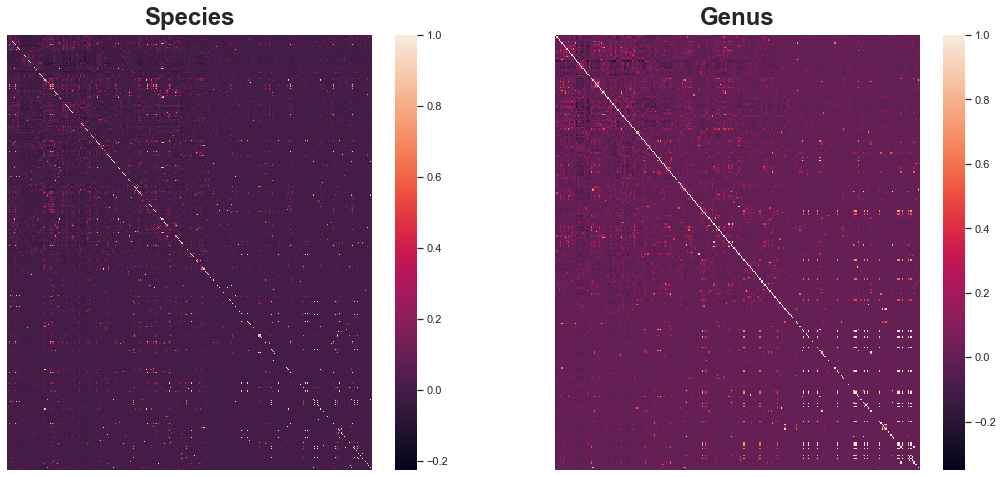

In [45]:
sns.set_theme()
fig = plt.figure(figsize = (18,8))

ax1 = fig.add_subplot(1, 2, 1)
sns.heatmap(species_corr, xticklabels="", yticklabels="", ax=ax1)
ax1.set_title('Species', fontdict={'fontsize':24, 'fontweight':'demibold'}, pad=10)


ax2 = fig.add_subplot(1, 2, 2)
sns.heatmap(genus_corr, xticklabels="", yticklabels="", ax=ax2)
ax2.set_title('Genus', fontdict={'fontsize':24, 'fontweight':'demibold'}, pad=10)

Correlation seems to be overall more positive in the genus data, but of course, correlation only tells us linear relationships and any more complex relationships won't be visible here. But it does seem promising and it may be possible that a linear model will be competitive with the more complex models.

Now to try and visualise some of the data but since the dataset has a lot of features, it'd be hard to visualise all of them. So let's just take a look at those with highest correlation to BMI.

My initial explorations into the data revealed that it is really sparse i.e. its mostly 0s. But some species, such as Prevotella stercorea whose range of values goes from 0 to 62.72, makes visualising on a histogram rather difficult. I could perhaps add 0.0001 the values and then do a log transformation, but I think a simple boxplot will be just as good.

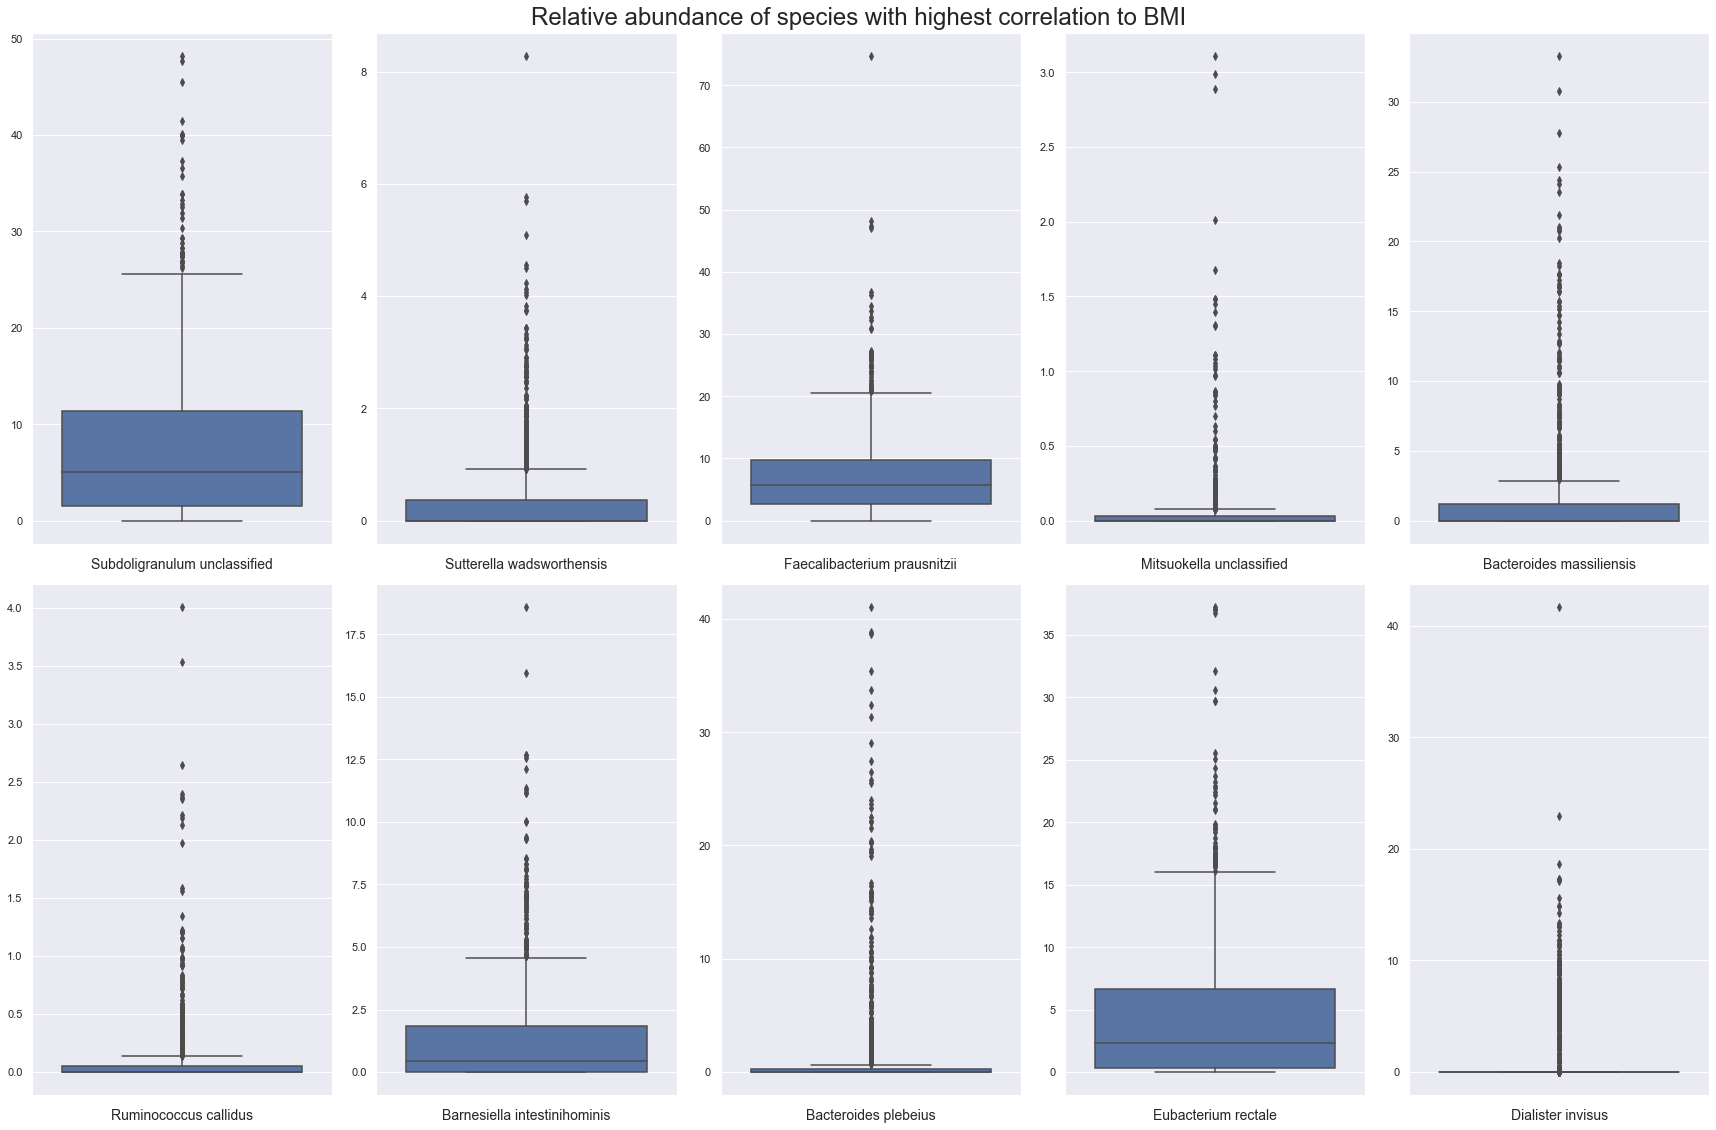

In [114]:
fig = plt.figure(figsize=(24,16))

topSP = species_corr['bmi'].abs().sort_values(ascending=False)[1:11].index.values

for i in range(10):
    fig.add_subplot(2, 5, i+1)
    sns.boxplot(y=species_data[topSP[i]])
    plt.ylabel('')
    plt.xlabel(topSP[i], fontdict={'fontsize':14})

plt.suptitle('Relative abundance of species with highest correlation to BMI', fontsize=24)
plt.tight_layout()

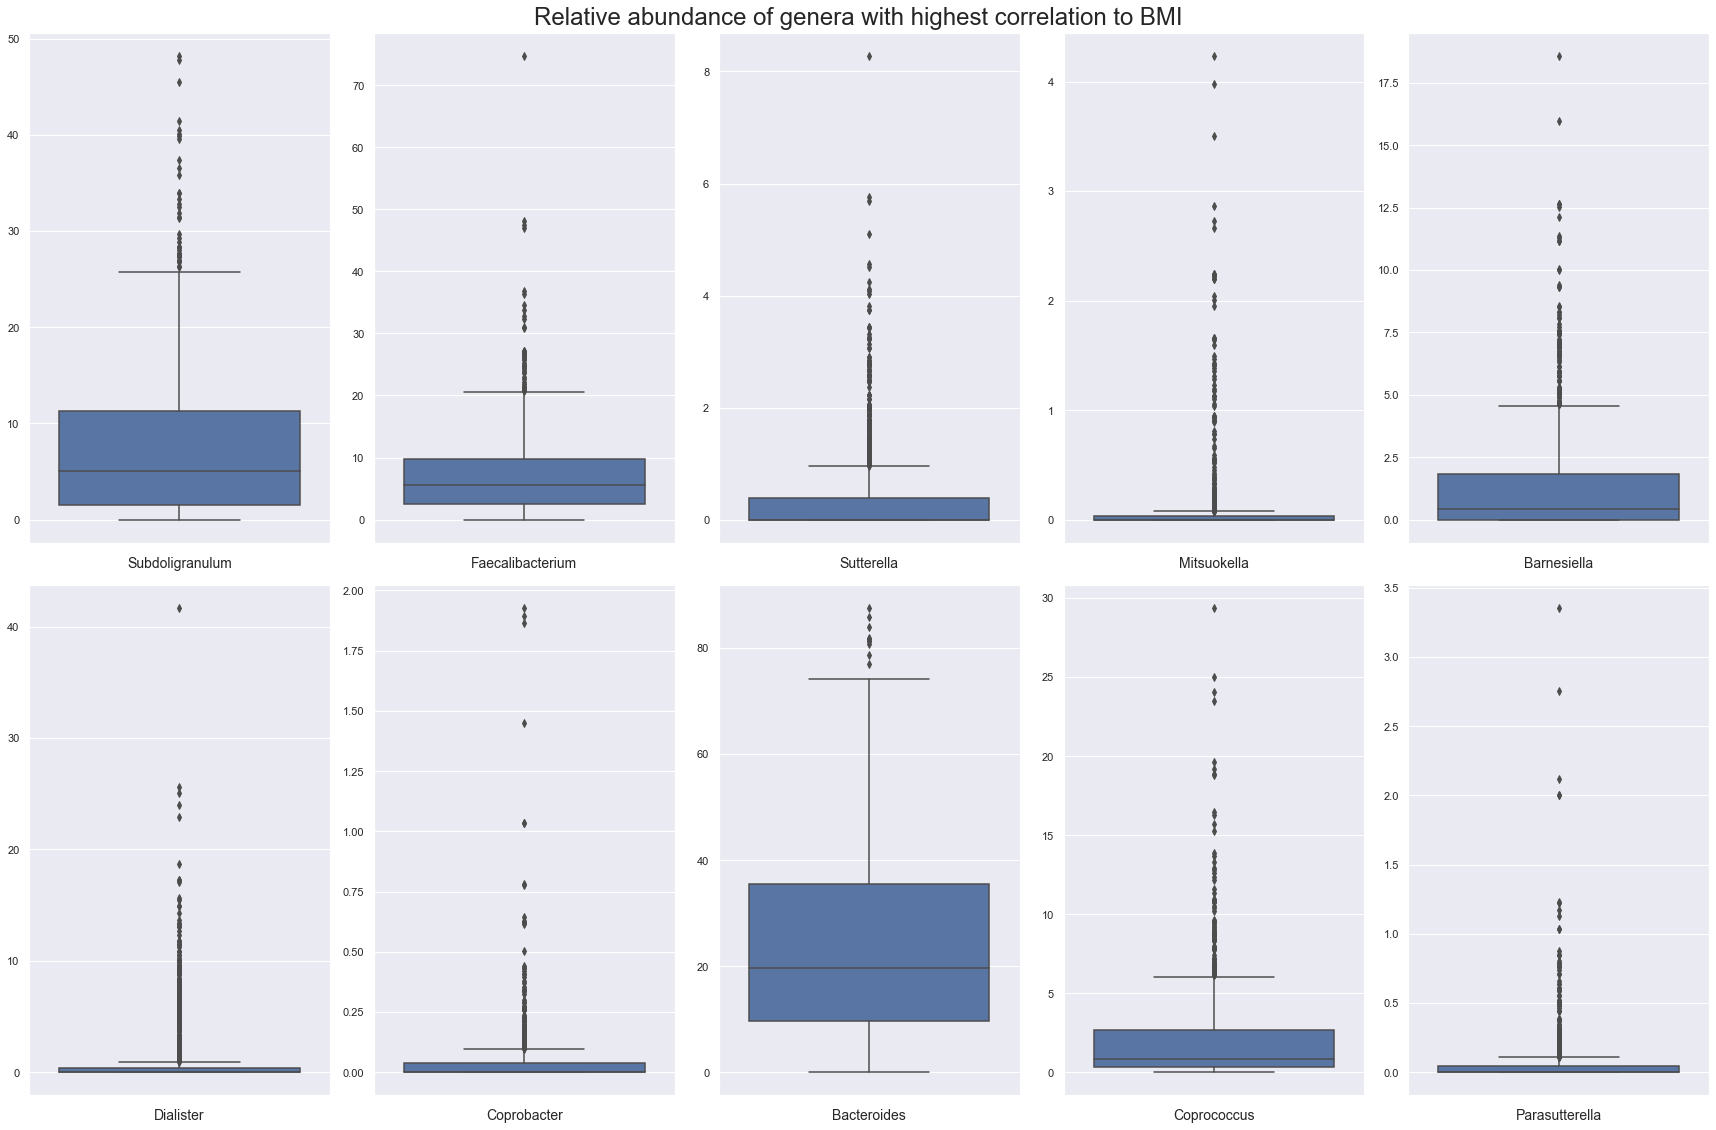

In [129]:
fig = plt.figure(figsize=(24,16))

top = genus_corr['bmi'].abs().sort_values(ascending=False)[1:11].index.values

for i in range(10):
    fig.add_subplot(2, 5, i+1)
    sns.boxplot(y=genus_data[top[i]])
    plt.ylabel('')
    plt.xlabel(top[i], fontdict={'fontsize':14})

plt.suptitle('Relative abundance of genera with highest correlation to BMI', fontsize=24)
plt.tight_layout()

I'm seeing the some of the same names in both genus and species. Now I'm wondering is it because a particular genus happens to contain many species that are correlated to BMI, like the Bacteroides genus or is it that for that particular genus, there's only 1 species which is also correlated.

Probably both, I think. Let's do a quick and dirty comparison.

The table below is just the total abundance of 5 genera and species in that genus as an example.


| Bacteroides                | 23423.79644 | Barnesiella                  | 1385.74241 | Faecalibacterium             | 7007.79046 | Mitsuokella              | 107.95674 | Sutterella                | 393.26686 |
|----------------------------|-------------|------------------------------|------------|------------------------------|------------|--------------------------|-----------|---------------------------|-----------|
| Bacteroides massiliensis | 1631.90750  | Barnesiella intestinihominis | 1385.74241 | Faecalibacterium prausnitzii | 7007.79046 | Mitsuokella unclassified | 68.24332  | Sutterella wadsworthensis | 388.70166 |
| Bacteroides plebeius     | 1672.98470  | 

In [127]:
species_data[topSP].reindex(sorted(species_data[topSP].columns), axis=1).sum()

Bacteroides massiliensis        1631.90750
Bacteroides plebeius            1672.98470
Barnesiella intestinihominis    1385.74241
Dialister invisus               1311.49223
Eubacterium rectale             4406.99525
Faecalibacterium prausnitzii    7007.79046
Mitsuokella unclassified          68.24332
Ruminococcus callidus            112.84501
Subdoligranulum unclassified    7426.90128
Sutterella wadsworthensis        388.70166
dtype: float64

In [128]:
genus_data[top].reindex(sorted(genus_data[top].columns), axis=1).sum()

Bacteroides         23423.79644
Barnesiella          1385.74241
Coprobacter            46.76369
Coprococcus          2052.11154
Dialister            1531.61466
Faecalibacterium     7007.79046
Mitsuokella           107.95674
Parasutterella         72.06018
Subdoligranulum      7474.84908
Sutterella            393.26686
dtype: float64

Now let's move on to modeling. I'm thinking of trying something in my approach to the hyperparameter optimisation:

What I'm going to try, is to first use a uniform distribution with randomsearchcv to find a good set of hyperparameters, then repeat the randomsearchcv, but this time using a normal distribution centered around those from the uniform distribution. Now as to whether this will improve the model accuracy significantly or am I just wasting my time, I guess I'll have to try it and find out.

I'll do the modeling for species data first.

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score

s_x = species_data.iloc[:, 7:species_data.shape[1]-1]
s_y = species_data.iloc[:, -1]

# # split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(s_x, s_y, test_size = 0.2, random_state = 63)

# # scale data based on training set
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [15]:
## Can't remember that this does but seems like it creates dictionary to record feature importance

# from collections import Counter

# c = Counter(short)

# test = dict(c)

# dict(sorted(test.items(), key=lambda item: -item[1]))

# import csv

# with open('dict.csv', 'w') as csv_file:  
#     writer = csv.writer(csv_file)
#     for key, value in test.items():
#        writer.writerow([key, value])

In [114]:
# def model_performance(model, x, y, n=50):
#     ''' does 50 train test splits and calculates model metrics'''
#     from sklearn import metrics
    
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
#     model.fit(x_train, y_train)
    
#     report = metrics.classification_report(y_test, model.predict(x_test), output_dict=True)
    
#     report_std = {}
    
#     for i in report.keys():
#         if i == 'accuracy':
#             report_std[i] = []
#         else:
#             report_std[i] = {}
#             for j in report[i].keys():
#                 report_std[i][j] = []

    
#     scoring = ['balanced_accuracy', 'accuracy', 'f1','precision','recall','roc_auc']

#     cross_val ={'balanced_accuracy':0, 'accuracy':0, 'f1':0,'precision':0,'recall':0,'roc_auc':0}
        
#     cross_val_std ={'balanced_accuracy':[], 'accuracy':[], 'f1':[],'precision':[],'recall':[],'roc_auc':[]}
    
#     for count in range(n):
        
#         x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
        
#         model.fit(x_train, y_train)
        
#         test = metrics.classification_report(y_test, model.predict(x_test), output_dict=True)
        
#         for i in report.keys():
#             if i == 'accuracy':
#                 report[i] += test[i]
#                 report_std[i].append(test[i])
#             else:
#                 for j in report[i].keys():
#                     report[i][j] += test[i][j]
#                     report_std[i][j].append(test[i][j])
       
#         for p in scoring:
#             scores = cross_val_score(model, x_train, y_train, scoring = p)

#             cross_val[p] += np.mean(scores)
            
#             cross_val_std[p].append((np.mean(scores)))
            
    
#     for i in scoring:
#         print(i)
#         print('mean: %0.3f' % (cross_val[i]/n))
#         print('std dev: %0.3f' % (np.std(cross_val_std[i])))
#         print()
        
#     for i in report.keys():
#         if i == 'accuracy':
#             report[i] = report[i]/(n+1)
#             report_std[i] = np.std(report_std[i])
#         else:
#             for j in report[i].keys():
#                 report[i][j] = report[i][j]/(n+1)
#                 report_std[i][j] = np.std(report_std[i][j])
        
#     return report, report_std


# def model_performance(model, x, y):
#     ''' 20 fold cross val score'''
#     scoring = ['balanced_accuracy', 'accuracy', 'f1','precision','recall','roc_auc']
    
#     for p in scoring:
#         scores = cross_val_score(model, x, y, cv=20, scoring = p)
#         print(p)
#         print('mean: %0.3f' % np.mean(scores))
#         print('std dev: %0.2f' % np.std(scores))
#         print()

In [146]:
# simple function to output the performance metrics of a model
# using balanced accuracy because the classes are not balanced

def model_performance(y_true, y_pred):
    '''prints model metrics'''

    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()

    print(classification_report(y_true, y_pred))
    print('balanced accuracy: {0:.4g}'.format(metrics.balanced_accuracy_score(y_true, y_pred)))



### Log regression ###

In [181]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, norm

#log_params = {'penalty':['l1', 'l2']}

# essentially, the hyperparameter c for regularisation strength will be randomly sampled from a uniform dist between 0 - 5
log_params = dict(C=uniform(loc=0.0, scale=20.0), penalty=['l2', 'l1'])

# fit log regression
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial')

# randomized hyperparameter search
log_reg_CV = RandomizedSearchCV(log_reg, log_params, n_iter = 50,  scoring = 'f1_weighted').fit(x_train, y_train)

log_reg_CV.best_params_

{'C': 1.1079640289930581, 'penalty': 'l2'}

              precision    recall  f1-score   support

           1       0.25      0.20      0.22         5
           2       0.57      0.64      0.60        81
           3       0.23      0.18      0.21        38
           4       0.62      0.61      0.61        69

    accuracy                           0.53       193
   macro avg       0.42      0.41      0.41       193
weighted avg       0.51      0.53      0.52       193

balanced accuracy: 0.4087


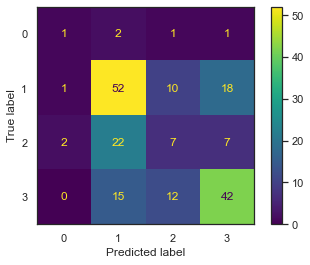

In [184]:
from sklearn.linear_model import LogisticRegression

# refit model with hyperparameters
log_reg1 = LogisticRegression(C=1.108, penalty='l2').fit(x_train, y_train)

# log_reg2 = LogisticRegression(C=0.34589, penalty='l2').fit(x_train, y_train)

log_pred1 = log_reg1.predict(x_test)

# log_pred2 = log_reg2.predict(x_test)

model_performance(y_test, log_pred1)

              precision    recall  f1-score   support

           1       0.25      0.20      0.22         5
           2       0.55      0.65      0.60        81
           3       0.25      0.18      0.21        38
           4       0.63      0.59      0.61        69

    accuracy                           0.53       193
   macro avg       0.42      0.41      0.41       193
weighted avg       0.51      0.53      0.52       193

balanced accuracy: 0.4082


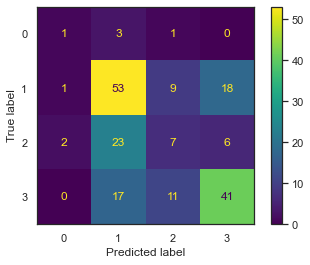

In [180]:
# sns.set_theme(style='white')



              precision    recall  f1-score   support

           1       0.25      0.20      0.22         5
           2       0.59      0.67      0.62        81
           3       0.29      0.21      0.24        38
           4       0.65      0.65      0.65        69

    accuracy                           0.56       193
   macro avg       0.44      0.43      0.44       193
weighted avg       0.54      0.56      0.55       193

balanced accuracy: 0.4323


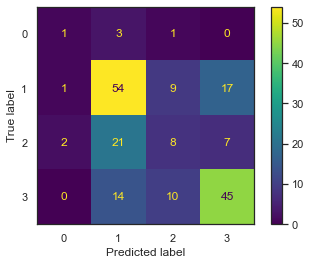

In [153]:
model_performance(y_test, log_pred2)

### Linear SVC ###

In [154]:
#linear SVM

from sklearn.svm import LinearSVC

linsvm_params = {'penalty':['l1','l2'], 'C':uniform(0, 10)}

lin_svm = LinearSVC(max_iter = 500)

linsvm_cv = RandomizedSearchCV(lin_svm, linsvm_params, n_iter = 50, cv=10, scoring = 'balanced_accuracy').fit(x_train, y_train)

linsvm_cv.best_params_

{'C': 2.9048698360813177, 'penalty': 'l2'}

In [155]:
linsv = LinearSVC(penalty='l2', C=2.905).fit(x_train, y_train)

lin_svm_pred = linsv.predict(x_test)

              precision    recall  f1-score   support

           1       0.15      0.40      0.22         5
           2       0.63      0.49      0.56        81
           3       0.32      0.37      0.34        38
           4       0.59      0.62      0.61        69

    accuracy                           0.51       193
   macro avg       0.42      0.47      0.43       193
weighted avg       0.54      0.51      0.52       193

balanced accuracy: 0.4714


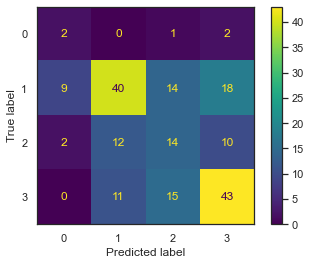

In [156]:
model_performance(y_test, lin_svm_pred)

### Kernel SVM ###

In [157]:
#step by step optimization

from sklearn.svm import SVC

svm_params = {'kernel':['rbf','sigmoid','poly'], 'C':uniform(loc=0, scale=10)}

svm = SVC(max_iter = 5000)

svm_cv = RandomizedSearchCV(svm, svm_params, scoring = 'balanced_accuracy', n_jobs = 4).fit(x_train, y_train)

svm_cv.best_params_

{'C': 6.103613328219031, 'kernel': 'sigmoid'}

              precision    recall  f1-score   support

           1       0.29      0.40      0.33         5
           2       0.52      0.64      0.57        81
           3       0.25      0.16      0.19        38
           4       0.63      0.57      0.60        69

    accuracy                           0.51       193
   macro avg       0.42      0.44      0.42       193
weighted avg       0.50      0.51      0.50       193

balanced accuracy: 0.4413


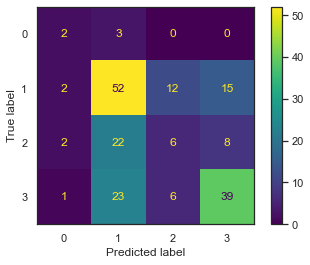

In [161]:
from sklearn.svm import SVC

svm = SVC(kernel = 'sigmoid', C = 6.10).fit(x_train, y_train)

model_performance(y_test, svm.predict(x_test))

### Decision Tree ###

In [164]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
tree_params = {'criterion':['gini','entropy'], 'max_depth':randint(5,50), 'min_samples_leaf':uniform(0.001, 0.1), 
               'max_features':['sqrt','log2','None']}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, tree_params, scoring = 'balanced_accuracy', n_jobs=4).fit(x_train, y_train)

tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 46,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.0453891136377737}

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.54      0.75      0.63        81
           3       0.00      0.00      0.00        38
           4       0.55      0.64      0.59        69

    accuracy                           0.54       193
   macro avg       0.27      0.35      0.30       193
weighted avg       0.42      0.54      0.48       193

balanced accuracy: 0.3477


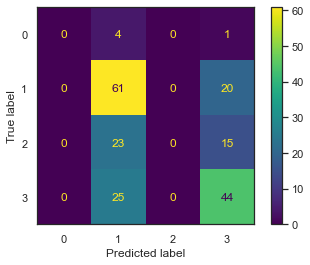

In [165]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 46, max_features = 'sqrt', min_samples_leaf = 0.0453).fit(x_train, y_train)

model_performance(y_test, tree.predict(x_test))

### Random Forest ###

In [166]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest_params = {'n_estimators':randint(0, 50), 'max_depth':randint(5, 20), 
                 'min_samples_leaf':uniform(0.001, 0.25), 'max_features':['sqrt','log2']}

forest_cv = RandomizedSearchCV(forest, forest_params, scoring = 'balanced_accuracy', n_jobs=4).fit(x_train, y_train)

forest_cv.best_params_

{'max_depth': 16,
 'max_features': 'log2',
 'min_samples_leaf': 0.009998341647978387,
 'n_estimators': 25}

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.52      0.89      0.66        81
           3       0.00      0.00      0.00        38
           4       0.64      0.51      0.56        69

    accuracy                           0.55       193
   macro avg       0.29      0.35      0.31       193
weighted avg       0.45      0.55      0.48       193

balanced accuracy: 0.349


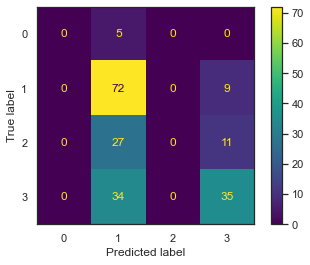

In [167]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 25, min_samples_leaf=0.00999, max_features='log2', max_depth = 16).fit(x_train, y_train)

model_performance(y_test, forest.predict(x_test))

### Naive Bayes ###

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.54      0.19      0.28        81
           3       0.18      0.16      0.17        38
           4       0.55      0.77      0.64        69

    accuracy                           0.38       193
   macro avg       0.32      0.28      0.27       193
weighted avg       0.46      0.38      0.38       193

balanced accuracy: 0.2778


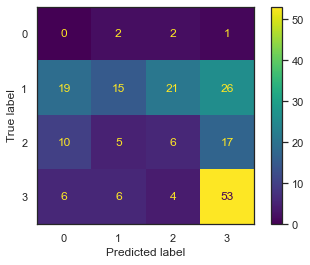

In [173]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB().fit(x_train, y_train)

model_performance(y_test, naive.predict(x_test))

In [18]:
naive.fit(x_train, y_train)

print(metrics.classification_report(y_test, naive.predict(x_test)))


GaussianNB()

### Adaboost ###

In [168]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada_params = {'n_estimators':randint(0, 200)}

ada_cv = RandomizedSearchCV(ada, ada_params, scoring = 'balanced_accuracy', n_jobs=4).fit(x_train, y_train)

ada_cv.best_params_

{'n_estimators': 66}

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.51      0.60      0.55        81
           3       0.00      0.00      0.00        38
           4       0.53      0.64      0.58        69

    accuracy                           0.48       193
   macro avg       0.26      0.31      0.28       193
weighted avg       0.40      0.48      0.44       193

balanced accuracy: 0.3107


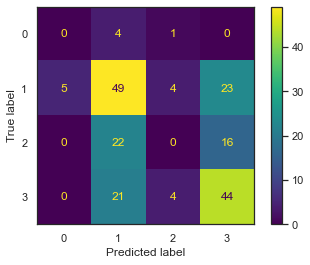

In [169]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 66).fit(x_train, y_train)

model_performance(y_test, ada.predict(x_test))

### Gradient Boost ###

In [175]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier()

grad_params = {'n_estimators':randint(0, 300)}

grad_cv = RandomizedSearchCV(grad, grad_params, n_jobs=4).fit(x_train, y_train)

grad_cv.best_params_

{'n_estimators': 145}

              precision    recall  f1-score   support

           1       0.20      0.20      0.20         5
           2       0.62      0.89      0.73        81
           3       0.58      0.18      0.28        38
           4       0.82      0.71      0.76        69

    accuracy                           0.67       193
   macro avg       0.56      0.50      0.49       193
weighted avg       0.67      0.67      0.64       193

balanced accuracy: 0.4958


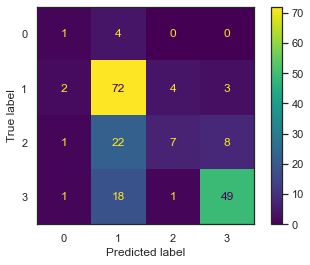

In [177]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators = 145).fit(x_train, y_train)

model_performance(y_test, grad.predict(x_test))

In [ ]:
grad = GradientBoostingClassifier()

report, report_std = model_performance(grad, x, y, n=20)

In [ ]:
report

In [ ]:
report_std

In [74]:
grad.fit(x_train, y_train)

# print(metrics.classification_report(y_test, grad.predict(x_test)))


GradientBoostingClassifier(max_depth=5, n_estimators=145)

In [ ]:

fig, ax = plt.subplots(1,2, figsize = (22,12))

#plot ROC curve

metrics.plot_roc_curve(log_reg, x_test, y_test, ax = ax[0], name = "Log Reggression")
metrics.plot_roc_curve(lin_svm, x_test, y_test, ax = ax[0], name = "Linear SVM")
metrics.plot_roc_curve(svm, x_test, y_test, ax = ax[0], name = "kernel SVM")
# metrics.plot_roc_curve(naive, x_test, y_test, ax = ax[0], name = "Naive Bayes")
metrics.plot_roc_curve(tree, x_test, y_test, ax = ax[0], name = "Decision Tree")
metrics.plot_roc_curve(forest, x_test, y_test, ax = ax[0], name = "Random Forest", ls = "-.", color='r', linewidth = 2)
metrics.plot_roc_curve(ada, x_test, y_test, ax = ax[0], name = "Adaboost")
metrics.plot_roc_curve(grad, x_test, y_test, ax = ax[0], name = "Gradient Boosting", ls = '--', color='black', linewidth=2)
ax[0].tick_params(axis='both', labelsize= 14)
ax[0].set_xlabel('False Postive Rate', fontsize = 24)
ax[0].set_ylabel('True Postive Rate', fontsize = 24)
ax[0].text(-0.08, 1.065, "A", fontsize=24, fontweight='bold', va='top', ha='right')
ax[0].legend(fontsize = 14)

#plot precision-recall curve

metrics.plot_precision_recall_curve(log_reg, x_test, y_test, ax = ax[1], name = "Log Reggression")
metrics.plot_precision_recall_curve(lin_svm, x_test, y_test, ax = ax[1], name = "Linear SVM")
metrics.plot_precision_recall_curve(svm, x_test, y_test, ax = ax[1], name = "kernel SVM")
# metrics.plot_precision_recall_curve(naive, x_test, y_test, ax = ax[1], name = "Naive Bayes")
metrics.plot_precision_recall_curve(tree, x_test, y_test, ax = ax[1], name = "Decision Tree")
metrics.plot_precision_recall_curve(forest, x_test, y_test, ax = ax[1], name = "Random Forest", ls = "-.", color='r', linewidth = 2)
metrics.plot_precision_recall_curve(ada, x_test, y_test, ax = ax[1], name = "Adaboost")
metrics.plot_precision_recall_curve(grad, x_test, y_test, ax = ax[1], name = "Gradient Boosting", ls = '--', color='black', linewidth=2)
ax[1].set_xlabel('Recall', fontsize = 24)
ax[1].set_ylabel('Precision', fontsize = 24)
ax[1].legend(loc = 'lower left',fontsize=14)
ax[1].tick_params(axis='both', labelsize= 16)
ax[1].text(-0.08, 1.035, "B", fontsize=24, fontweight='bold', va='top', ha='right')


plt.tight_layout()
plt.savefig('performance',dpi=300)


#always put savefig before show(), if not will save empty image.
plt.show()

### Dataframe of permutation importance of better performing models ###

### Also the plots ###

In [13]:
from sklearn.inspection import permutation_importance

# forest_importance = permutation_importance(forest, x_test, y_test, scoring = 'balanced_accuracy', n_jobs = 2, random_state = 42)

# ada_importance = permutation_importance(ada, x_test, y_test, scoring = 'balanced_accuracy', n_jobs = 2, random_state = 42)

grad_importance = permutation_importance(grad, x_test, y_test, scoring = 'balanced_accuracy', n_jobs = 2, n_repeats = 100, random_state = 42)

# svm_importance = permutation_importance(svm, x_test, y_test, scoring = 'balanced_accuracy', n_jobs = 2, random_state = 42)


In [47]:
# features = list(processed.columns[7:-1])

In [59]:
# perm_impt = pd.DataFrame(columns = ['Features', 'Forest','Grad', 'Ada', 'SVM'])

# perm_impt['Features'] = features

# perm_impt['Forest'] = forest_importance['importances_mean']

# perm_impt['Ada'] = ada_importance['importances_mean']

# perm_impt['Grad'] = grad_importance['importances_mean']

# perm_impt['SVM'] = svm_importance['importances_mean']

#perm_impt.to_csv('permutation_importance.csv', index=False)

In [60]:
# perm_impt = pd.read_csv('feature_importance.csv')

# forest_impt = list(perm_impt['Features'][perm_impt['Forest'] > 0])

# ada_impt = list(perm_impt['Features'][perm_impt['Ada'] > 0])

# grad_impt = list(perm_impt['Features'][perm_impt['Grad'] > 0])


In [31]:
# feature_count = []

# for model in ['Forest','Grad', 'Ada']:
#     feature_count.append((perm_impt[model] > 0).value_counts()[True])


In [63]:
# from matplotlib_venn import venn2

# forest_impt = list(perm_impt['Features'][perm_impt['Forest'] > 0])
# grad_impt = list(perm_impt['Features'][perm_impt['Grad'] > 0])
# ada_impt = list(perm_impt['Features'][perm_impt['Ada'] > 0])
# svm_impt = list(perm_impt['Features'][perm_impt['SVM'] > 0])


In [ ]:
# x_labels = ['Random Forest','Gradient Boost', 'AdaBoost']

# # Plot the figure.
# fig, ax = plt.subplots(1,1, figsize = (14,10), facecolor = 'white')

# ax = pd.Series(feature_count).plot(kind='bar')
# ax.set_title('No. of Important Features', fontsize = 18, fontweight = 'bold', pad = 10)
# ax.set_xlabel('Classifier', fontsize = 16, fontweight = 'bold', labelpad = 10)
# ax.set_ylabel('Count',  fontsize = 16, fontweight = 'bold', labelpad = 10)
# ax.set_xticklabels(x_labels, rotation = 0, fontsize = 14)

# rects = ax.patches

# # Make some labels.

# for rect, label in zip(rects, feature_count):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
#             ha='center', va='bottom', fontsize = 14)

# plt.savefig('impt_feature_count.png', dpi=150)
    
# plt.show()


In [163]:
diabetes_impt = pd.read_csv('dict_diabetes.csv', names=['features', 'count'])

grad_impt = pd.read_csv('dict_obs.csv', names=['features', 'count'])

cirr_impt = pd.read_csv('dict_cirrhosis.csv', names=['features', 'count'])

In [ ]:
from venn import venn

test = {'Obesity':set(grad_impt['features']), 'Diabetes':set(diabetes_impt['features'])} #, 'Cirrhosis':set(cirr_impt['features'])}

fig, ax = plt.subplots(1,1, figsize = (14,10), facecolor='white')

venn(test, fontsize = 18, legend_loc = 'lower left', ax=ax)

#ax.set_title('Feature Overlap between Classifiers', fontsize = 18, fontweight ='bold', y=0.90)

plt.tight_layout()

plt.savefig('venn_diagram.png', dpi=200)



In [54]:
del test

### Gradient Boost analysis ###

In [6]:

#grad_perm.to_csv('grad_perm_impt.csv', index=False)

grad_perm = pd.read_csv('obs_avg_impt.csv')

In [ ]:
from sklearn.inspection import permutation_importance

from sklearn.ensemble import GradientBoostingClassifier

impt_score = np.zeros((826,))

for i in range(50):
    # split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

    grad = GradientBoostingClassifier(n_estimators = 145, max_depth = 5).fit(x_train, y_train)
    
    perm_impt = permutation_importance(grad, x_test, y_test, scoring='balanced_accuracy', n_jobs = 2)
    
    # filter dataset
    
    impt_score += perm_impt['importances_mean']
    
temp1 = pd.DataFrame(columns = ['features','impt'])
    
temp1['features'] = short
temp1['impt'] = impt_score/50
    
temp2 = temp1[temp1['impt'] > 0].copy()
temp2.sort_values(by='impt', ascending=False, inplace=True, ignore_index=True)

In [113]:
temp2[:10]

,features,impt
0,Klebsiella pneumoniae,0.022613
1,Bacteroides intestinalis,0.010920
2,Bacteroides stercoris,0.005639
3,Bacteroides pectinophilus,0.003882
4,Streptococcus thermophilus,0.003866
5,Ruminococcus obeum,0.003856
6,Bacteroides massiliensis,0.003327
7,Sutterella wadsworthensis,0.003230
8,Prevotella copri,0.002498
9,Barnesiella intestinihominis,0.002216


In [115]:
temp2.to_csv('obs_avg_impt.csv', index_label=None)

In [150]:
# dataframe of impt bacteria and permutation importance

# grad_perm = pd.DataFrame(columns = ['Features','importances_mean', 'importances_std'])
# grad_perm['Features'] = species
# grad_perm['importances_mean'] = grad_importance['importances_mean']
# grad_perm['importances_std'] = grad_importance['importances_std']
# grad_perm = grad_perm[grad_perm['importances_mean'] > 0].copy()
# grad_perm.sort_values(by='importances_mean', ascending=False, inplace=True, ignore_index=True)

In [78]:
test = list(temp2[:11]['features'])

test.pop(8)

'Streptococcus australis'

In [80]:
# dataframe with all data including BMI, country etc

stuff = list(processed.columns[:7]) + test + ['label']

grad_stuff = processed[stuff]

In [82]:
# changing labels for control and obese

#grad_stuff = grad_means.copy()

grad_stuff['label'][grad_stuff['label'] == 1] = 'Obese'

grad_stuff['label'][grad_stuff['label'] == 0] = 'Ctrl'

In [89]:
# calculate mean species abundance for each species

means = grad_stuff.groupby(by = 'label').mean().iloc[:,1:]

# create a dataframe for mean abundance

grad_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

grad_means['Bacteria'] = test
grad_means['Ctrl'] = list(means.iloc[0, :10])
grad_means['Obese'] = list(means.iloc[1, :10])

In [123]:
mann = []

for i in test:
    ctrl = grad_stuff[i][grad_stuff['label'] == 'Ctrl']
    fat = grad_stuff[i][grad_stuff['label'] == 'Obese']
    mann.append(sp.stats.mannwhitneyu(ctrl, fat))

In [133]:
mann

[MannwhitneyuResult(statistic=50021.0, pvalue=5.743462986209846e-29),
 MannwhitneyuResult(statistic=56065.0, pvalue=1.0373227210850577e-13),
 MannwhitneyuResult(statistic=53000.5, pvalue=4.4726913092891246e-14),
 MannwhitneyuResult(statistic=54095.0, pvalue=1.7819259764379774e-13),
 MannwhitneyuResult(statistic=74871.0, pvalue=0.0913742088911158),
 MannwhitneyuResult(statistic=56985.0, pvalue=3.5359461021296864e-11),
 MannwhitneyuResult(statistic=76291.5, pvalue=0.3969552609320985),
 MannwhitneyuResult(statistic=54231.0, pvalue=4.563468300691354e-13),
 MannwhitneyuResult(statistic=76269.0, pvalue=0.40894672831154855),
 MannwhitneyuResult(statistic=72018.0, pvalue=0.06459181295598002)]

In [ ]:
ind = np.arange(len(grad_means))

width = 0.4

fig, ax = plt.subplots(figsize = (16,10))

color = ['royalblue', 'orange']
ax.barh(ind, grad_means.Ctrl, width, color = color[1], label = 'Ctrl', edgecolor ='black')
ax.barh(ind + width, grad_means.Obese, width, color = color[0], label = 'Obese', edgecolor ='black')
ax.set(yticks = ind + width/2, yticklabels = grad_means.Bacteria)
#ax.set_title('Mea', fontsize = 18, fontweight='bold', pad=20)
#ax.set_xscale('log')
ax.set_ylabel('Species', fontsize = 18, fontweight='bold')
ax.set_xlabel("Relative Abundance", fontsize = 18, fontweight = 'bold', labelpad = 20)
ax.legend(loc='lower right', fontsize = 'x-large')
ax.tick_params(axis='both', labelsize = 14)
plt.gca().invert_yaxis()

plt.savefig('Grad_impt_abundance.png', dpi=200, bbox_inches = "tight")

plt.show()

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(temp2['impt'])

plt.xlabel('Species', fontsize = 16, fontweight = 'bold', labelpad=10)
plt.tick_params(axis='both', labelsize=10)

plt.ylabel('Permutation Importance', fontsize = 16, fontweight = 'bold', labelpad=10)

plt.tight_layout()

plt.savefig('grad_perm_impt_line.png', dpi=200)

In [93]:
test

['Klebsiella pneumoniae',
 'Bacteroides intestinalis',
 'Dorea longicatena',
 'Bacteroides stercoris',
 'Bacteroides pectinophilus',
 'Bacteroides massiliensis',
 'Clostridium sp L2 50',
 'Barnesiella intestinihominis',
 'Streptococcus thermophilus',
 'Ruminococcus obeum']

grad_perm = perm_impt[['Features','Grad']].copy()

grad_perm = grad_perm[grad_perm['Grad'] > 0].copy()

# sort from highest to lowest importance
grad_perm.sort_values(by='Grad', ascending=False, inplace=True, ignore_index=True)

impt_features = grad_perm['Features'].copy()


regex to shorten species names

c = re.compile(r's__(\w+)')

short = []

for i in grad_perm['Features']:
    short.append( c.search(i).group(1).replace("_", " "))
    
grad_perm['Features'] = short


create a list of features we want from the original data
stuff = list(processed.columns[:7]) + list(impt_features) + ['label']

# filter the original dataset

grad_stuff = processed[stuff].copy()

# change bacteria name to be shorter
new = dict(zip(impt_features, short))

grad_stuff.rename(columns = new, inplace=True)

# changing labels for control and obese
grad_stuff['label'][grad_stuff['label'] == 1] = 'Obese'

grad_stuff['label'][grad_stuff['label'] == 0] = 'Ctrl'

# calculate mean species abundance for each species

means = grad_stuff.groupby(by = 'label').mean().iloc[:,1:]

# create a dataframe for mean abundance

grad_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

grad_means['Bacteria'] = short
grad_means['Ctrl'] = list(means.iloc[0, :])
grad_means['Obese'] = list(means.iloc[1, :])

# plots permutation importance and abundance

fig, ax = plt.subplots(1,2, figsize=(16,10))


ax[0].plot(grad_perm['Grad'])
ax[0].set_xlabel('Species', fontsize=18, labelpad = 10)
ax[0].set_ylabel('Permutation importance', fontsize=18, labelpad = 10)
ax[0].tick_params(axis="both", labelsize=14)

ax[1].scatter([range(len(grad_perm))], grad_means['Ctrl'])
ax[1].scatter([range(len(grad_perm))], grad_means['Obese'])
ax[1].set_xlabel('Species', fontsize=18, labelpad = 10)
ax[1].set_ylabel('Species Abundance', fontsize=18, labelpad = 5)
ax[1].tick_params(axis="both", labelsize=14)
ax[1].legend(['Control','Obese'], fontsize = 'xx-large')

plt.tight_layout()
plt.savefig('grad_perm_importance.png', dpi=150)
plt.show()


### Comparison plots for the 11 common ones ###

In [66]:
# this one basically finds the common species in all models
common = [i for i in species if (i in forest_impt) and (i in grad_impt) and (i in ada_impt)]

# this one is to remove the s__ in the species names
c = re.compile(r's__(\w+)')

short = []

for i in common:
    short.append( c.search(i).group(1).replace("_", " "))

In [68]:
# filers the feature importance table to see the 8 common species got what coefficient

common_impt = perm_impt[perm_impt['Features'].isin(common)]

In [69]:
# create a new table from the original table that consists of the 8 common bacteria and the other info

common_only = processed[(list(processed.columns[:7]) + common + ['label'])]

common_only['label'][common_only['label'] == 1] = 'Obese'

common_only['label'][common_only['label'] == 0] = 'Ctrl'

# rename the columns to the shortened bacteria name 
common_only.rename(columns = dict(zip(common_only.columns[7:-1], short)), inplace =True)


# create 2 dataframes with mean and std dev for each species and BMI

means = common_only.groupby(by = 'label').mean().iloc[:,1:]
error = common_only.groupby(by = 'label').std().iloc[:,1:]

In [70]:
#  creates a dataframe with species name, then the mean species abundance for controls and obese groups then plot a barchart

compare_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

compare_means['Bacteria'] = short
compare_means['Ctrl'] = list(means.iloc[0, :])
compare_means['Obese'] = list(means.iloc[1, :])

# compare_means.plot(x = 'Bacteria', y = ['Ctrl', 'Obese'], kind='barh', title = 'All', logx=True, figsize = (14,8), 
#                    xlabel = 'Mean Relative Abundance', ylabel = 'Bacteria', fontsize=14)

In [ ]:
create_summary(common_only, list(common_only['country']))

In [ ]:
create_summary(common_only, ['china'], name= "China", filename = 'china_8_common.png')

In [74]:
# this functions calculates the mean of the relative abundance and plots barcharts. 
# Take note that it uses some variables that were declared earlier, so it is not entirely standalone. No need to remove the categorical stuff
# since groupby removes them

def create_summary(dataframe, group, name = 'Unnamed', filename = ('Unnamed' + '.png'), color = ['royalblue', 'orange']):

    #create new DF with the group of interest
    grouped = dataframe[dataframe['country'].isin(group)].copy()
    
    # create 2 dataframes with mean and std dev for each species and BMI

    g_means = grouped.groupby(by = 'label').mean().iloc[:,1:]
    g_error = grouped.groupby(by = 'label').std().iloc[:,1:]

    #  creates a dataframe with species name, then the mean species abundance for controls and obese groups then plot a barchart

    grouped_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

    grouped_means['Bacteria'] = short
    grouped_means['Ctrl'] = list(g_means.iloc[0, :])
    grouped_means['Obese'] = list(g_means.iloc[1, :])

    ind = np.arange(len(grouped_means))

    width = 0.4

    fig, ax = plt.subplots(figsize = (16,10))


    ax.barh(ind, grouped_means.Obese, width, color = color[0], label = 'Obese')
    ax.barh(ind + width, grouped_means.Ctrl, width, color = color[1], label = 'Ctrl')
    ax.set(yticks = ind + width, yticklabels = grouped_means.Bacteria)
    ax.set_title(name, fontsize = 18, fontweight='bold', pad=20)
    ax.set_xscale('log')
    ax.set_ylabel('Species', fontsize = 18, fontweight='bold')
    ax.set_xlabel("Log Relative Abundance", fontsize = 18, fontweight = 'bold', labelpad = 20)
    ax.legend(loc='lower right', fontsize = 'x-large')
    ax.tick_params(axis='both', labelsize = 14)
    plt.gca().invert_yaxis()
    
    #plt.savefig(filename, dpi=150, bbox_inches = "tight")
    
    plt.show()

In [ ]:
create_summary(common_only, ['china'], name= "China", filename = 'china_8_common.png')

### Random Forest feature analysis ### 

In [98]:
test = processed.iloc[:, 7:-1].corr()

In [107]:
test.fillna(0, inplace=True)

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(test, xticklabels=False, yticklabels =False, cmap = cmap)

In [ ]:
data['dataset_name'].value_counts()

In [44]:
# create dataframe that contains all impt features from random forest model and sort them

forest_perm = perm_impt[['Features','Forest']].copy()

forest_perm = forest_perm[forest_perm['Forest'] > 0].copy()

forest_perm.sort_values(by='Forest', ascending=False, inplace=True, ignore_index=True)

impt_features = forest_perm['Features'].copy()


# regex to shorten species names

c = re.compile(r's__(\w+)')

short = []

for i in forest_perm['Features']:
    short.append( c.search(i).group(1).replace("_", " "))

forest_perm['Features'] = short

# create a list of features we want from the original data
stuff = list(processed.columns[:7]) + list(impt_features) + ['label']

# filter the original dataset

forest_stuff = processed[stuff].copy()

# change bacteria name to be shorter
new = dict(zip(impt_features, short))

forest_stuff.rename(columns = new, inplace=True)

# changing labels for control and obese
forest_stuff['label'][forest_stuff['label'] == 1] = 'Obese'

forest_stuff['label'][forest_stuff['label'] == 0] = 'Ctrl'


In [40]:
# calculate mean species abundance for each species

means = forest_stuff.groupby(by = 'label').mean().iloc[:,1:]

# create a dataframe for mean abundance

forest_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

forest_means['Bacteria'] = short
forest_means['Ctrl'] = list(means.iloc[0, :])
forest_means['Obese'] = list(means.iloc[1, :])



In [ ]:
# dual plot of perm importance and species abundance

fig, ax = plt.subplots(1,2, figsize=(16,10))


ax[0].plot(forest_perm['Forest'])
ax[0].set_xlabel('Species', fontsize=18, labelpad = 10)
ax[0].set_ylabel('Permutation importance', fontsize=18, labelpad = 10)
ax[0].tick_params(axis="both", labelsize=14)

ax[1].scatter([range(35)], forest_means['Ctrl'])
ax[1].scatter([range(35)], forest_means['Obese'])
ax[1].set_xlabel('Species', fontsize=18, labelpad = 10)
ax[1].set_ylabel('Species Abundance', fontsize=18, labelpad = 5)
ax[1].tick_params(axis="both", labelsize=14)
ax[1].legend(['Control','Obese'], fontsize = 'xx-large')

plt.tight_layout()
plt.savefig('forest_perm_importance.png', dpi=150)
plt.show()


In [54]:
# plot barchart

create_summary(forest_stuff, list(forest_stuff['country'].unique()), name='forest')

eu = ['denmark', 'spain', 'sweden', 'germany','france', 'iceland']

# create_summary(forest_stuff, eu, name='forest')

In [55]:
# find the common and different points

# create dataframe of the EU and CN data and obtain their means
eu_only = forest_stuff[forest_stuff['country'].isin(eu)]

cn_only = forest_stuff[forest_stuff['country'].isin(['china'])]

eu_mean = eu_only.groupby(by='label').mean().drop(columns = 'bmi').transpose().reset_index()

cn_mean = cn_only.groupby(by='label').mean().drop(columns = 'bmi').transpose().reset_index()

eu_mean['ctrl_larger'] = eu_mean['Ctrl'] > eu_mean['Obese']

cn_mean['ctrl_larger'] = cn_mean['Ctrl'] > cn_mean['Obese']

# agreement dataframe

eu_mean['agreement'] = eu_mean['ctrl_larger'] & cn_mean['ctrl_larger']

agreed = eu_mean[['index','agreement']][eu_mean['agreement'] == True].copy()

In [57]:
# common and differences for the EU countries

den = forest_stuff[forest_stuff['country'].isin(['denmark'])]

#france = forest_stuff[forest_stuff['country'].isin(['france'])]

den_mean = den.groupby(by='label').mean().drop(columns = 'bmi').transpose().reset_index()

#france_mean = france.groupby(by='label').mean().drop(columns = 'bmi').transpose().reset_index()

den_mean['ctrl_larger'] = den_mean['Ctrl'] > den_mean['Obese']

#france_mean['ctrl_larger'] = france_mean['Ctrl'] > france_mean['Obese']

# agreement dataframe

den_mean['agreement'] = den_mean['ctrl_larger'] & cn_mean['ctrl_larger']

#agreed = eu_mean[['index','agreement']][eu_mean['agreement'] == True].copy()

In [ ]:
#create new DF with the group of interest

# grouped = forest_stuff[ list(agreed['index']) + ['label'] ]

# create 2 dataframes with mean and std dev for each species and BMI

# g_means = grouped.groupby(by='label').mean().iloc[:,:]
# g_error = grouped.groupby(by= 'label').std().iloc[:,:]

#  creates a dataframe with species name, then the mean species abundance for controls and obese groups then plot a barchart

# grouped_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

# grouped_means['Bacteria'] = list(grouped.columns[:-1])
# grouped_means['Ctrl'] = list(g_means.iloc[0, :])
# grouped_means['Obese'] = list(g_means.iloc[1, :])

ind = np.arange(len(grouped_means))

width = 0.4

fig, ax = plt.subplots(figsize = (16,10))

color = ['royalblue', 'orange']
ax.barh(ind, grouped_means.Obese, width, color = color[0], label = 'Obese')
ax.barh(ind + width, grouped_means.Ctrl, width, color = color[1], label = 'Ctrl')
ax.set(yticks = ind + width, yticklabels = grouped_means.Bacteria)
ax.set_title('test', fontsize = 18, fontweight='bold', pad=20)
ax.set_xscale('log')
ax.set_ylabel('Species', fontsize = 18, fontweight='bold')
ax.set_xlabel("Log Relative Abundance", fontsize = 18, fontweight = 'bold', labelpad = 20)
ax.legend(loc='lower right', fontsize = 'x-large')
ax.tick_params(axis='both', labelsize = 14)
plt.gca().invert_yaxis()

# #plt.savefig(filename, dpi=150, bbox_inches = "tight")

plt.show()

In [ ]:
eu_mean['label'][eu_mean['agreement']==True]

In [78]:
# let's try comparing importance with abundance

forest_perm['relative_impt'] = forest_perm['Forest'].div(forest_perm['Forest'].sum(), axis=0)